# Carte Carrington

- synoptic map https://cesam.lam.fr/lascomission/Lascomission/synoptic_and_carrington_maps.html

In [7]:
import os
from module import carrington
import matplotlib.pyplot as plt

c:\Users\lherrington\anaconda3\envs\climso\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
folder = 'carrington_test_data/'

carrington_list = []
for filename in os.listdir(folder):
    carrington_list.append(carrington(folder + filename))

In [9]:
for carr in carrington_list:
    print(carr.observer_coordinate)

<SkyCoord (HeliographicStonyhurst: obstime=2024-03-06T15:29:00.000, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, m)
    (0., -7.25177566, 1.48441985e+11)>
<SkyCoord (HeliographicStonyhurst: obstime=2024-03-12T12:18:00.000, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, m)
    (0., -7.20757588, 1.48673298e+11)>
<SkyCoord (HeliographicStonyhurst: obstime=2024-03-13T16:02:00.000, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, m)
    (0., -7.18994674, 1.48719113e+11)>
<SkyCoord (HeliographicStonyhurst: obstime=2024-03-15T11:48:00.000, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, m)
    (0., -7.15619853, 1.48791692e+11)>
<SkyCoord (HeliographicStonyhurst: obstime=2024-03-17T11:28:01.000, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, m)
    (0., -7.11124227, 1.48871336e+11)>
<SkyCoord (HeliographicStonyhurst: obstime=2024-03-19T09:39:00.000, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, m)
    (0., -7.05960667, 1.48949322e+11)>


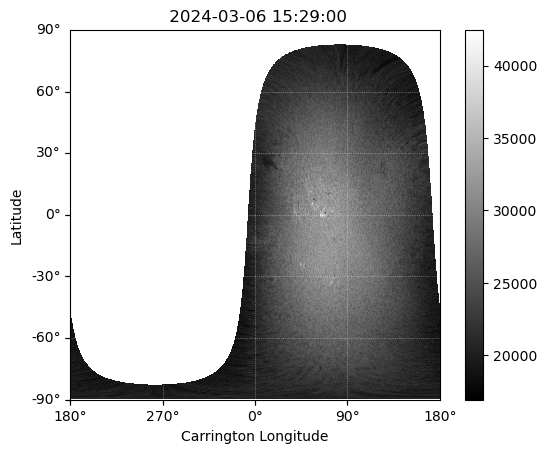

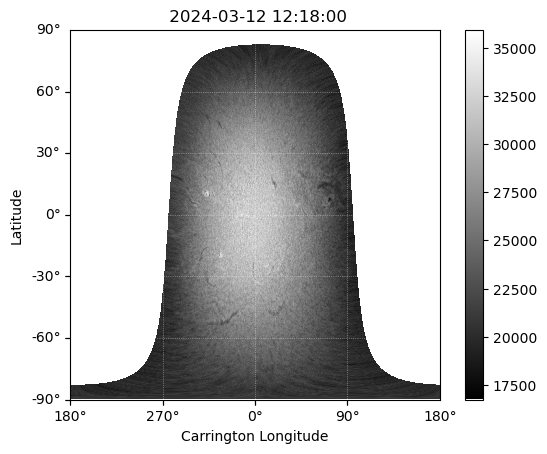

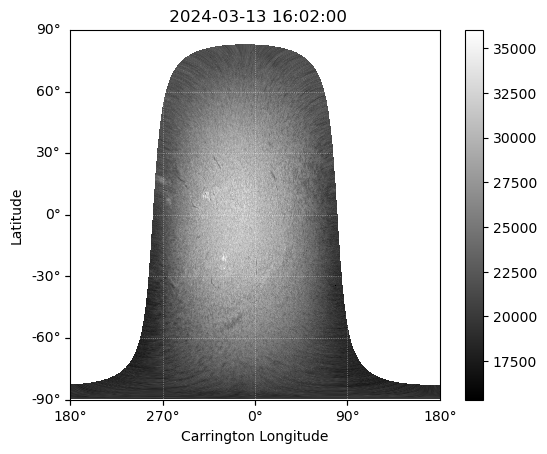

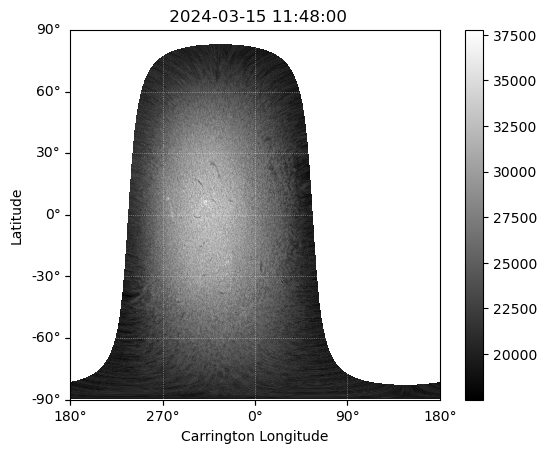

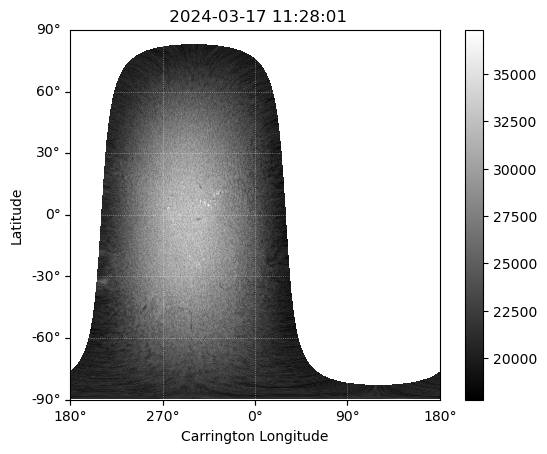

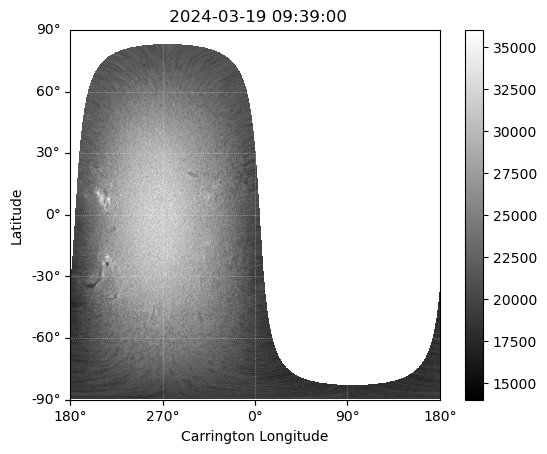

In [10]:
for carr in carrington_list:
    fig = plt.figure()
    ax = fig.add_subplot(projection=carr)
    im = carr.plot(axes=ax)
    plt.colorbar(im, ax=ax)

In [11]:
for carr in carrington_list:
    print((carr.carrington_longitude.deg))

82.95443468631467
5.642339810448644
350.4135805315856
326.3788216010944
300.19947100188597
274.8322992234559


In [12]:
carrington_list.sort(key=lambda x: x.carrington_longitude.deg)

In [103]:
carr_longs = []
for carr in carrington_list:
    idx = int((carr.carrington_longitude.deg)*carr.data.shape[1]/360)
    carr_longs.append(idx)
    print(idx)

32
471
1563
1707
1856
1993


In [134]:
import numpy as np

img = np.empty(carrington_list[0].data.shape)
for idx in range(0,len(carrington_list)):    
    if idx==0:
        start_index = int(np.floor(carr_longs[0] - (2048-carr_longs[-1]+carr_longs[0])/2))
    else:
        start_index = end_index

    if idx==len(carrington_list)-1:
        end_index = int(np.ceil(carr_longs[0] - (2048-carr_longs[-1]+carr_longs[0])/2))
    else:
        end_index = int(np.ceil((carr_longs[idx]+carr_longs[idx+1])/2))
    
    print(start_index)
    print(end_index)
    
    if  start_index < 0 :
        img[:,start_index+2048:] = np.roll(carrington_list[idx].data, 1024, axis = 1)[:,start_index+2048:]
        img[:,:end_index] = np.roll(carrington_list[idx].data, 1024, axis = 1)[:,:end_index]
    else:  
        img[:,start_index:end_index] = np.roll(carrington_list[idx].data, 1024, axis = 1)[:,start_index:end_index]

img = np.roll(img, 1024, axis = 1)

-12
252
252
1017
1017
1635
1635
1782
1782
1925
1925
-11


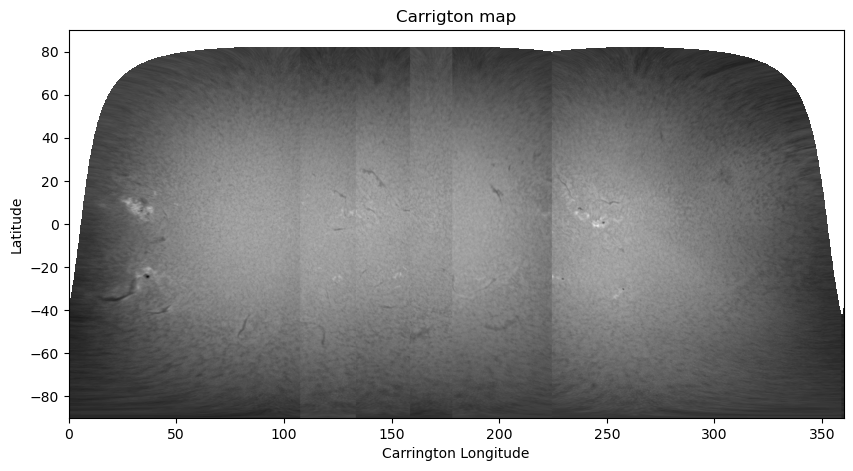

In [156]:
fig = plt.figure(figsize=(10,10))
plt.imshow(img, cmap='gray', origin='lower', extent=[0,360,-90,90])
 
plt.axis()

plt.xlabel('Carrington Longitude');
plt.ylabel('Latitude');

plt.title('Carrigton map');

